In [4]:
import pandas as pd
from globals import YELP_DIR
import json
import chardet
import os

import matplotlib.pyplot as plt

dataset = "foursquarenyc"

DATASET_DIR = f"/Volumes/Forster Neu/Masterarbeit Data/snowcard/TSC_EEL_EXPORT.csv"
user_events = pd.read_csv(DATASET_DIR, encoding="latin1", sep=";", header=None, names=["timestamp", "user_id", "region_id", "region_name", "lift", "card_type"])

In [6]:
len(user_events["region_id"].unique())

82

In [39]:
user_events.shape

(6380945, 6)

In [40]:
len(user_events["user_id"].unique())

26805

In [41]:
len(user_events["region_id"].unique())

82

In [42]:
len(user_events["lift"].unique())

786

In [43]:
sparsity = len(user_events) / (len(user_events["user_id"].unique()) * len(user_events["region_id"].unique()))

sparsity

2.9030554911033164

<Axes: xlabel='lift'>

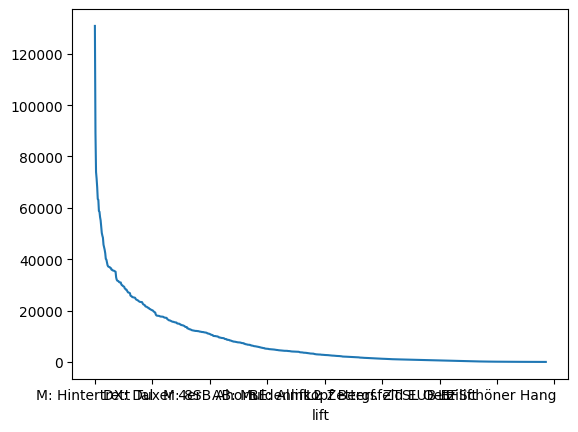

In [49]:
user_events["lift"].value_counts().plot()

In [50]:
# user distribution
user_dist = user_events["user_id"].value_counts()
num_users = user_dist.shape[0]
print("Mean POI check-ins per User: ", user_events["user_id"].value_counts().mean())
print("Min POI check-ins per User: ", user_events["user_id"].value_counts().min())
print("Max POI check-ins per User: ", user_events["user_id"].value_counts().max())
print("Number of users: ", num_users)

# item distribution
item_dist = user_events["lift"].value_counts()
num_items = item_dist.shape[0]
print("Number of POIs (items): ", num_items)

# sparsity
print("Sparsity:", 1 - len(user_events) / (len(user_events["user_id"].unique()) * len(user_events["lift"].unique())))


Mean POI check-ins per User:  238.05055027047192
Min POI check-ins per User:  1
Max POI check-ins per User:  3770
Number of users:  26805
Number of POIs (items):  786
Sparsity: 0.6971367044904937


NotADirectoryError: [Errno 20] Not a directory: '/Volumes/Forster Neu/Masterarbeit Data/TSC_EEL_EXPORT.csv/plots/Long-tail of Check-Ins (foursquarenyc).png'

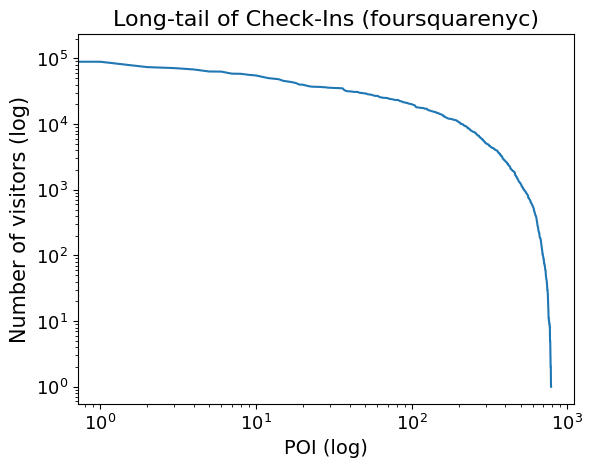

In [51]:
# plot item distribution
plt.figure()
plt.plot(item_dist.values, linestyle='-')
plt.title(f'Long-tail of Check-Ins ({dataset})', fontsize=16)
plt.xlabel('POI (log)', fontsize=14)
plt.ylabel('Number of visitors (log)', fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

#plt.savefig(f'{DATASET_DIR}/plots/Long-tail of Check-Ins ({dataset})', dpi=300)

plt.show()
